In [2]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 18.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [8]:
print(df.columns)


Index(['Price', 'Log_Return'], dtype='object')


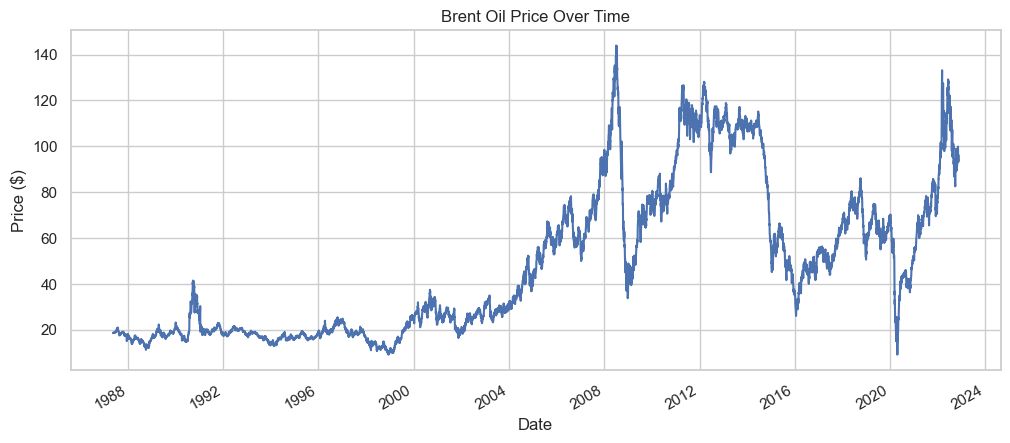

In [10]:
# Cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import pickle
import os

# Set plotting style
sns.set(style='whitegrid')
%matplotlib inline

# Load data
df = pd.read_csv("../data/processed_prices.csv")

# Ensure datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Keep the main column
series = df['Price']
series.plot(title="Brent Oil Price Over Time", figsize=(12, 5))
plt.ylabel("Price ($)")
plt.show()


In [12]:
import os

# Create the directory if it doesn't exist
os.makedirs("../../figures", exist_ok=True)

# Now save the figure
plt.savefig("../../figures/ets_forecast.png")
plt.show()


<Figure size 640x480 with 0 Axes>

/Users/tagesehandiso/miniforge3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tagesehandiso/miniforge3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/tagesehandiso/miniforge3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


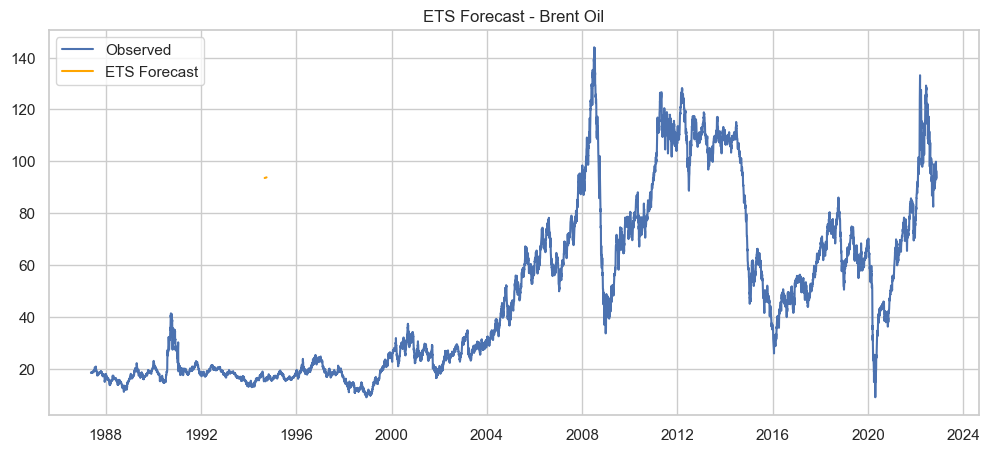

In [13]:
# Cell 2
ets_model = ExponentialSmoothing(series, trend="add", seasonal=None).fit()
ets_forecast = ets_model.forecast(30)

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(series, label="Observed")
plt.plot(ets_forecast, label="ETS Forecast", color='orange')
plt.title("ETS Forecast - Brent Oil")
plt.legend()
plt.savefig("../../figures/ets_forecast.png")
plt.show()


/Users/tagesehandiso/miniforge3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tagesehandiso/miniforge3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tagesehandiso/miniforge3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tagesehandiso/miniforge3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

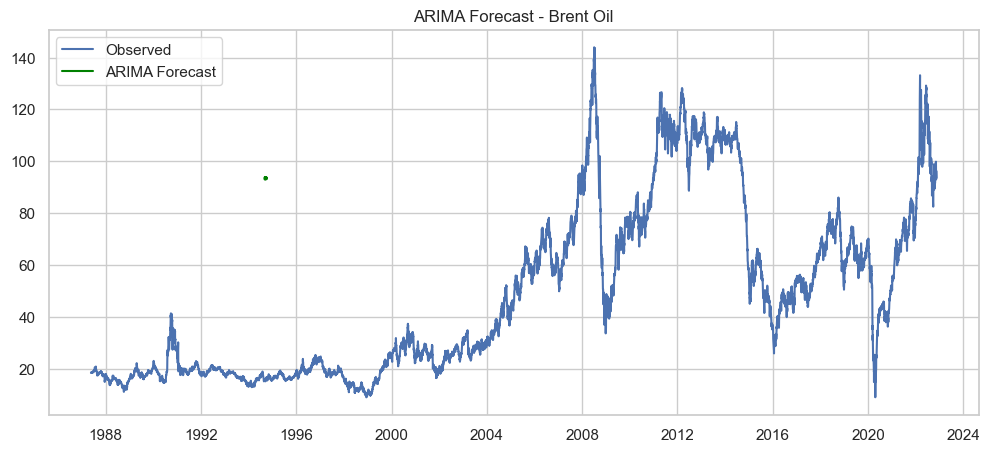

In [14]:
# Cell 3
arima_model = ARIMA(series, order=(5, 1, 2)).fit()
arima_forecast = arima_model.forecast(30)

# Plot ARIMA forecast
plt.figure(figsize=(12, 5))
plt.plot(series, label="Observed")
plt.plot(arima_forecast, label="ARIMA Forecast", color='green')
plt.title("ARIMA Forecast - Brent Oil")
plt.legend()
plt.savefig("../../figures/arima_forecast.png")
plt.show()


In [17]:
import os

# Create models directory if not exists
os.makedirs("../../models", exist_ok=True)

with open("../models/ets_model.pkl", "wb") as f:
    pickle.dump(ets_model, f)

with open("../../models/arima_model.pkl", "wb") as f:
    pickle.dump(arima_model, f)


In [18]:
# Cell 4
with open("../models/ets_model.pkl", "wb") as f:
    pickle.dump(ets_model, f)

with open("../../models/arima_model.pkl", "wb") as f:
    pickle.dump(arima_model, f)


In [20]:
!pip install scikit-learn



  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.1 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scikit-learn] [scikit-learn]


In [22]:
# Cell 5
from sklearn.metrics import mean_squared_error

# Compare in-sample fit
ets_pred = ets_model.fittedvalues
arima_pred = arima_model.fittedvalues

ets_mse = mean_squared_error(series, ets_pred)

# For ARIMA, fittedvalues might be shorter, align accordingly:
arima_pred_aligned = arima_pred[-len(series[1:]):]  # or slice to match series[1:]
arima_mse = mean_squared_error(series[1:], arima_pred_aligned)


print(f"ETS MSE: {ets_mse:.2f}")
print(f"ARIMA MSE: {arima_mse:.2f}")


ETS MSE: 1.48
ARIMA MSE: 1.47
